In [141]:
!pip install xgboost==1.0.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
train_set = pd.read_excel('Data_Train.xlsx')
test_set = pd.read_excel('Test_set.xlsx')

In [ ]:
train_set.head()

In [ ]:
train_set.describe()

In [ ]:
train_set.info()

In [ ]:
train_set.isna().sum()

In [ ]:
train_set.shape

In [ ]:
train_set = train_set.dropna()
train_set.shape

In [ ]:
train_set.head(5)

## Finding Unique Values

In [ ]:
train_set['Airline'].unique()

In [ ]:
train_set['Source'].unique()

In [ ]:
train_set['Destination'].unique()

In [ ]:
train_set['Additional_Info'].unique()

In [ ]:
train_set['Total_Stops'].unique()

## Duration into Hour and Minute

In [ ]:
h = train_set['Duration'].str.extract('(\d+)h', expand=False).astype(float)
m = train_set['Duration'].str.extract('(\d+)m', expand=False).astype(float)
train_set['Duration_Hour'] = h
train_set['Duration_minute'] = m
train_set['Duration_Hour'] = train_set['Duration_Hour'].fillna(0)
train_set['Duration_minute'] = train_set['Duration_minute'].fillna(0)

In [ ]:
train_set.drop('Duration',axis=1,inplace=True)

## Date of Journey to Date and Month 

In [ ]:
train_set['Date_of_Journey_date'] = pd.to_datetime(train_set['Date_of_Journey']).dt.day
train_set['Date_of_Journey_month'] = pd.to_datetime(train_set['Date_of_Journey']).dt.month
train_set.drop('Date_of_Journey',inplace=True,axis=1)

## Dep_Time Hour and Minute

In [ ]:
arr = np.array(train_set['Dep_Time'])
train_set['Dep_Time'] = pd.to_datetime(arr)
train_set['Dep_Time_minute'] = train_set['Dep_Time'].dt.minute
train_set['Dep_Time_hour'] = train_set['Dep_Time'].dt.hour
train_set['Dep_Time_minute'] = train_set['Dep_Time_minute'].fillna(0)
train_set['Dep_Time_hour'] = train_set['Dep_Time_hour'].fillna(0)
train_set.drop('Dep_Time',axis=1,inplace=True)

## Arrival_Time Hour and Minute

In [ ]:
arr = np.array(train_set['Arrival_Time'])
train_set['Arrival_Time'] = pd.to_datetime(arr)
train_set['Arrival_Time_minute'] = train_set['Arrival_Time'].dt.minute
train_set['Arrival_Time_hour'] = train_set['Arrival_Time'].dt.hour
train_set['Arrival_Time_minute'] = train_set['Arrival_Time_minute'].fillna(0)
train_set['Arrival_Time_hour'] = train_set['Arrival_Time_hour'].fillna(0)
train_set.drop('Arrival_Time',axis=1,inplace=True)

## Total_Stops mapping

In [ ]:
train_set = train_set.replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

## Dropping Route and Additional_info

In [ ]:
train_set.drop(['Route','Additional_Info'],axis=1,inplace=True)

## Creating Dummies for Airline, Source, Destination

In [ ]:
train_set = train_set.join(pd.get_dummies(train_set[['Airline','Source','Destination']]))

## Dropping Airline, Source, Destination.


In [ ]:
train_set.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [ ]:
train_set.head(5)

In [166]:
x = train_set.drop('Price',axis=1)
y = train_set['Price']
scalar = StandardScaler()
sc_model = scalar.fit_transform(x)

# Test Dataset

In [167]:
h = test_set['Duration'].str.extract('(\d+)h', expand=False).astype(float)
m = test_set['Duration'].str.extract('(\d+)m', expand=False).astype(float)
test_set['Duration_Hour'] = h
test_set['Duration_minute'] = m
test_set['Duration_Hour'] = test_set['Duration_Hour'].fillna(0)
test_set['Duration_minute'] = test_set['Duration_minute'].fillna(0)

In [168]:
test_set.drop('Duration',axis=1,inplace=True)

In [169]:
test_set['Date_of_Journey_date'] = pd.to_datetime(test_set['Date_of_Journey']).dt.day
test_set['Date_of_Journey_month'] = pd.to_datetime(test_set['Date_of_Journey']).dt.month
test_set.drop('Date_of_Journey',inplace=True,axis=1)

In [170]:
arr = np.array(test_set['Dep_Time'])
test_set['Dep_Time'] = pd.to_datetime(arr)
test_set['Dep_Time_minute'] = test_set['Dep_Time'].dt.minute
test_set['Dep_Time_hour'] = test_set['Dep_Time'].dt.hour
test_set['Dep_Time_minute'] = test_set['Dep_Time_minute'].fillna(0)
test_set['Dep_Time_hour'] = test_set['Dep_Time_hour'].fillna(0)
test_set.drop('Dep_Time',axis=1,inplace=True)

In [171]:
arr = np.array(test_set['Arrival_Time'])
test_set['Arrival_Time'] = pd.to_datetime(arr)
test_set['Arrival_Time_minute'] = test_set['Arrival_Time'].dt.minute
test_set['Arrival_Time_hour'] = test_set['Arrival_Time'].dt.hour
test_set['Arrival_Time_minute'] = test_set['Arrival_Time_minute'].fillna(0)
test_set['Arrival_Time_hour'] = test_set['Arrival_Time_hour'].fillna(0)
test_set.drop('Arrival_Time',axis=1,inplace=True)

In [172]:
test_set = test_set.replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [173]:
test_set.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [174]:
test_set = test_set.join(pd.get_dummies(test_set[['Airline','Source','Destination']]))

In [175]:
test_set.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [176]:
test_set['Airline_Trujet'] = 0
scalar = StandardScaler()
sc_model = scalar.fit(test_set)
X_test_scaled = sc_model.transform(x)


In [177]:
y_predict = model.predict(X_test_scaled)

In [178]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [179]:
print(selection.feature_importances_)

[2.19423238e-01 1.33077347e-01 1.82219943e-02 1.10261166e-01
 8.46957297e-02 2.15509189e-02 2.50810237e-02 2.07659434e-02
 2.83826213e-02 2.11134587e-03 9.11674946e-03 1.72976064e-03
 1.65767823e-02 1.39580287e-01 6.64150418e-02 1.87854713e-02
 8.59566868e-04 2.86938806e-03 9.37941487e-05 4.78566334e-03
 1.36907826e-04 7.55843769e-03 5.75397544e-04 8.31246386e-03
 2.06825082e-03 6.29171381e-03 2.38827122e-03 7.07841326e-03
 1.65412505e-02 8.30555513e-03 5.30729580e-04 1.58287754e-02]


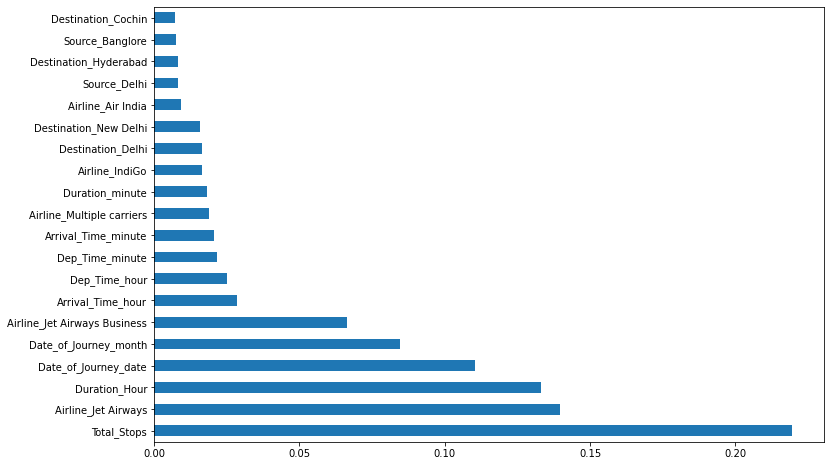

In [180]:
plt.figure(figsize=(12,8))
feat_imp = pd.Series(selection.feature_importances_,index = x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

## Training and Testing

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [182]:
xgs = XGBRegressor()

In [183]:
xgs_model = xgs.fit(X_train,y_train)
y_pred = xgs_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


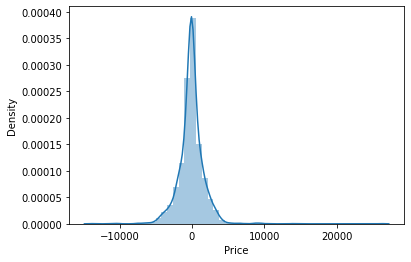

In [184]:
sns.distplot(y_test-y_pred)

In [185]:
mean_squared_error(y_test,y_pred)

3037090.891512459

## Paramter Tuning

In [186]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [187]:
grid= GridSearchCV(xgs_model,param_grid, verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.754, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.747, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.776, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.669, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.739, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.799, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.747, total=   0.2s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.820, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.716, total=   0.3s
[CV] learning_

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  7.5min finished


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [188]:
xgr = XGBRegressor(learning_rate =  0.1, max_depth =  5, n_estimators = 200)
new_model_xgb = xgr.fit(X_train,y_train)
y_pred = new_model_xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


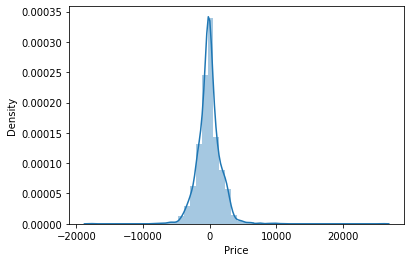

In [189]:
sns.distplot(y_test-y_pred)

In [190]:
mean_squared_error(y_test,y_pred)

3100977.4164339174

## Saving Model

In [191]:
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(new_model_xgb, open(filename, 'wb'))

filename_scaler = 'sc_model.pickle'
pickle.dump(sc_model, open(filename_scaler, 'wb'))


loaded_model = pickle.load(open(filename, 'rb'))
scalar_model = pickle.load(open(filename_scaler, 'rb'))